In [ ]:
!pip install pandas_profiling

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.5.1-py2.py3-none-any.whl (357 kB)
  Using cached pydantic-1.10.12-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1


In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns
from pandas_profiling import ProfileReport

<ipython-input-4-2f02fa02f497>:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">HealthCare Report | EDA Guidelines 📊</p>



The main idea of this notebook is to show how to make and EDA job focusiong on different types of plots and chartes. I want to focus this notebook on interative plots with Plotly. I think that other libraries like seaborn and awesome and absolutely necesary for any Data Scientist job, but in this case i want to show interative plots. I will focus on other libraries in other tutorials.

So here you can see how to extract information from a dataset and how to plot.

![netflix.jpg](attachment:netflix.jpg)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Healthcare/metadata.csv")
df.head()

,Sample_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,...,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype,Unnamed: 26
0,ACH-000535,BxPC-3,BXPC3,BXPC3_PANCREAS,NaN,906693,Female,ATCC,2,-4.199437,...,Pancreatic Cancer,"Ductal Adenocarcinoma, exocrine",61,SIDM00132,NaN,pancreas,exocrine,exocrine_adenocarcinoma,NaN,NaN
1,ACH-001402,SW756,SW756,SW756_CERVIX,NaN,724839,Female,ATCC,2,-3.690125,...,Cervical Cancer,Squamous Cell Carcinoma,46,SIDM01174,NaN,cervix,cervical_squamous,NaN,NaN,NaN
2,ACH-000862,KMBC-2,KMBC2,KMBC2_URINARY_TRACT,NaN,NaN,Unknown,HSRRB,2,-3.879925,...,Bladder Cancer,Carcinoma,NaN,NaN,NaN,urinary_tract,bladder_carcinoma,NaN,NaN,NaN
3,ACH-000545,VM-CUB1,VMCUB1,VMCUB1_URINARY_TRACT,NaN,909780,Male,DSMZ,2,-3.977976,...,Bladder Cancer,Transitional Cell Carcinoma,NaN,SIDM00414,NaN,urinary_tract,bladder_carcinoma,bladder_transitional_cell,NaN,NaN
4,ACH-000851,MOR/CPR,MORCPR,MORCPR_LUNG,NaN,NaN,Unknown,ECACC,3,-3.570376,...,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Adenocarci...",NaN,NaN,NaN,lung,NSCLC,NSCLC_adenocarcinoma,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sample_ID                  908 non-null    object 
 1   cell_line_name             892 non-null    object 
 2   stripped_cell_line_name    908 non-null    object 
 3   CCLE_Name                  908 non-null    object 
 4   alias                      49 non-null     object 
 5   COSMICID                   486 non-null    object 
 6   sex                        908 non-null    object 
 7   source                     907 non-null    object 
 8   Achilles_n_replicates      857 non-null    object 
 9   cell_line_NNMD             857 non-null    float64
 10  culture_type               687 non-null    object 
 11  culture_medium             855 non-null    object 
 12  cas9_activity              849 non-null    object 
 13  RRID                       826 non-null    object 

In [ ]:
report = ProfileReport(df)

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

Lets check how many nulls are there in the data

In [ ]:
df.nunique()

Sample_ID                    908
cell_line_name               892
stripped_cell_line_name      908
CCLE_Name                    908
alias                         49
COSMICID                     486
sex                            4
source                        19
Achilles_n_replicates          7
cell_line_NNMD               850
culture_type                  16
culture_medium               183
cas9_activity                418
RRID                         826
WTSI_Master_Cell_ID          504
sample_collection_site        39
primary_or_metastasis          9
primary_disease               33
Subtype                      129
age                          104
Sanger_Model_ID              574
depmap_public_comments         7
lineage                       29
lineage_subtype               86
lineage_sub_subtype           75
lineage_molecular_subtype     17
Unnamed: 26                    2
dtype: int64

In [ ]:
df.isna().sum()

Sample_ID                      0
cell_line_name                16
stripped_cell_line_name        0
CCLE_Name                      0
alias                        859
COSMICID                     422
sex                            0
source                         1
Achilles_n_replicates         51
cell_line_NNMD                51
culture_type                 221
culture_medium                53
cas9_activity                 59
RRID                          82
WTSI_Master_Cell_ID          404
sample_collection_site        18
primary_or_metastasis        178
primary_disease               13
Subtype                       29
age                          280
Sanger_Model_ID              334
depmap_public_comments       898
lineage                       19
lineage_subtype                4
lineage_sub_subtype          438
lineage_molecular_subtype    825
Unnamed: 26                  905
dtype: int64

    i. The webapp should allow the user to select genes from datasets and plot 2D scatter plots between 2 variables(expression/copy_number/chronos) for
       any pair of genes.

   ii. The user should be able to filter and color data points using metadata information available in the file “metadata.csv”.

   iii. The visualization could be interactive - It would be great if the user can hover over the data-points on the plot and get the relevant information (hint -
        visit https://plotly.com/r/, https://plotly.com/python)

   iv. Here is a quick reference for you. The scatter plot is between chronos score for TTBK2 gene and expression for MORC2 gene with coloring defined by
        Gender/Sex column from the metadata file.

   i. User should be able to select a gene and a variable (expression / chronos / copy_number) and generate a boxplot to display its distribution across
      multiple categories as defined by user selected variable (a column from the metadata file)

  ii. Here is an example for your reference where violin plot for CHRONOS score for gene CCL22 is plotted and grouped by ‘Lineage’

### Fix rating missings

In [ ]:
df['lineage'].unique()

array(['pancreas', 'cervix', 'urinary_tract', 'lung', 'gastric', 'skin',
       'upper_aerodigestive', 'ovary', 'soft_tissue',
       'central_nervous_system', 'breast', 'bone', 'uterus', 'lymphocyte',
       'bile_duct', 'peripheral_nervous_system', 'eye', 'kidney',
       'colorectal', 'liver', 'blood', nan, 'esophagus', 'plasma_cell',
       'thyroid', 'prostate', 'embryo', 'fibroblast',
       'epidermoid_carcinoma', 'engineered_kidney'], dtype=object)

In [ ]:
df[df['lineage'].isna()]

,Sample_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,...,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype,Unnamed: 26
47,ACH-000246,SLR 23,SLR23,SLR23_KIDNEY,NaN,NaN,Unknown,Academic lab,2,-4.760812,...,Metastasis,Kidney Cancer,Renal Cell Carcinoma,NaN,NaN,NaN,kidney,renal_cell_carcinoma,NaN,NaN
78,ACH-001289,COG-AR-359,COGAR359,COGAR359_SOFT_TISSUE,NaN,NaN,Male,Children&#39,s Oncology Group,2.000000,...,NaN,Rhabdoid,Atypical Teratoid Rhabdoid Tumor (ATRT),NaN,NaN,NaN,soft_tissue,ATRT,NaN,NaN
104,ACH-000143,NaN,HCC2429,HCC2429_LUNG,NaN,NaN,Female,Academic lab,2,-3.450923,...,NaN,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), unspecified",34,NaN,NaN,lung,NSCLC,NaN,NaN
109,ACH-000025,CH-157MN,CH157MN,CH157MN_CENTRAL_NERVOUS_SYSTEM,NaN,NaN,Female,Academic lab,2,-4.186947,...,NaN,Brain Cancer,Meningioma,NaN,NaN,NaN,central_nervous_system,meningioma,NaN,NaN
115,ACH-000029,HCC-827-GR5,HCC827GR5,HCC827GR5_LUNG,HCC827 GR5,NaN,Female,Academic lab,2,-4.519949,...,Primary,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Adenocarci...",39,NaN,NaN,lung,NSCLC,NSCLC_adenocarcinoma,NaN
135,ACH-000272,SLR 24,SLR24,SLR24_KIDNEY,NaN,NaN,Unknown,Academic lab,2,-4.072240,...,Primary,Kidney Cancer,Renal Cell Carcinoma,NaN,NaN,NaN,kidney,renal_cell_carcinoma,NaN,NaN
146,ACH-001301,COGN278,COGN278,COGN278_AUTONOMIC_GANGLIA,NaN,NaN,Unknown,Children&#39,s Oncology Group,2.000000,...,NaN,Neuroblastoma,NaN,NaN,NaN,NaN,peripheral_nervous_system,neuroblastoma,NaN,MYCN_amp
214,ACH-000436,OCI-My7,OCIMY7,OCIMY7_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,OCI-MY7,NaN,Unknown,Academic lab,2,-2.740178,...,NaN,Myeloma,Multiple Myeloma,NaN,NaN,NaN,plasma_cell,multiple_myeloma,NaN,NaN
234,ACH-001033,CHLA-57,CHLA57,CHLA57_BONE,NaN,NaN,Unknown,Children&#39,s Oncology Group,2.000000,...,NaN,Bone Cancer,Ewings Sarcoma,NaN,NaN,NaN,bone,Ewing_sarcoma,NaN,NaN
319,ACH-000215,LN382,LN382,LN382_CENTRAL_NERVOUS_SYSTEM,LN-382,NaN,Male,Academic lab,2,-5.640311,...,NaN,Brain Cancer,Glioblastoma,NaN,NaN,NaN,central_nervous_system,glioma,glioblastoma,NaN


In [ ]:
df[df['age'].isna()]

,Sample_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,...,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype,Unnamed: 26
2,ACH-000862,KMBC-2,KMBC2,KMBC2_URINARY_TRACT,NaN,NaN,Unknown,HSRRB,2,-3.879925,...,Bladder Cancer,Carcinoma,NaN,NaN,NaN,urinary_tract,bladder_carcinoma,NaN,NaN,NaN
3,ACH-000545,VM-CUB1,VMCUB1,VMCUB1_URINARY_TRACT,NaN,909780,Male,DSMZ,2,-3.977976,...,Bladder Cancer,Transitional Cell Carcinoma,NaN,SIDM00414,NaN,urinary_tract,bladder_carcinoma,bladder_transitional_cell,NaN,NaN
4,ACH-000851,MOR/CPR,MORCPR,MORCPR_LUNG,NaN,NaN,Unknown,ECACC,3,-3.570376,...,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Adenocarci...",NaN,NaN,NaN,lung,NSCLC,NSCLC_adenocarcinoma,NaN,NaN
8,ACH-001151,OVCAR-5,OVCAR5,OVCAR5_OVARY,NaN,905969,Female,Academic lab,2,-6.349090,...,Ovarian Cancer,"Adenocarcinoma, high grade serous",NaN,SIDM00091,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN,NaN
9,ACH-001433,CCLF_PEDS_0008_T,CCLFPEDS0008T,CCLFPEDS0008T_SOFT_TISSUE,NaN,NaN,Unknown,Cancer Cell Line Factory,2,-3.601811,...,Sarcoma,Epithelioid,NaN,NaN,NaN,soft_tissue,epithelioid_sarcoma,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,ACH-001193,SK-PN-DW,SKPNDW,SKPNDW_BONE,NaN,909731,Male,Academic lab,2,-2.311089,...,Bone Cancer,Ewings Sarcoma,NaN,SIDM01097,NaN,bone,Ewing_sarcoma,NaN,EWS_FLI,NaN
902,ACH-001053,D425,D425,D425_CENTRAL_NERVOUS_SYSTEM,NaN,NaN,Unknown,Academic lab,3,-2.852908,...,Brain Cancer,Medulloblastoma,NaN,NaN,NaN,central_nervous_system,medulloblastoma,med_group_3,MYC_amp,NaN
903,ACH-000760,LNZ308,LNZ308,LNZ308_CENTRAL_NERVOUS_SYSTEM,NaN,NaN,Unknown,Academic lab,2,-5.056674,...,Brain Cancer,Glioblastoma,NaN,SIDM00682,NaN,central_nervous_system,glioma,glioblastoma,NaN,NaN
904,ACH-002002,A375 SKIN CJ2,A375SKINCJ2,A375_SKIN_CJ2_RESISTANT,A375 ER-2,NaN,Unknown,Academic lab,2,-4.238159,...,Skin Cancer,Melanoma,NaN,NaN,Drug resistance: SCH772984,skin,melanoma,NaN,NaN,NaN


### Drop director and cast columns

In [ ]:
df = df.drop(['lineage_molecular_subtype', 'lineage_sub_subtype'], axis=1)
df.columns

Index(['Sample_ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name',
       'alias', 'COSMICID', 'sex', 'source', 'Achilles_n_replicates',
       'cell_line_NNMD', 'culture_type', 'culture_medium', 'cas9_activity',
       'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site',
       'primary_or_metastasis', 'primary_disease', 'Subtype', 'age',
       'Sanger_Model_ID', 'depmap_public_comments', 'lineage',
       'lineage_subtype', 'Unnamed: 26'],
      dtype='object')

### Fix date_added missings

In [ ]:
df[df['primary_disease'].isna()]

,Sample_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,...,sample_collection_site,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,Unnamed: 26
78,ACH-001289,COG-AR-359,COGAR359,COGAR359_SOFT_TISSUE,NaN,NaN,Male,Children&#39,s Oncology Group,2.000000,...,NaN,central_nervous_system,NaN,Rhabdoid,Atypical Teratoid Rhabdoid Tumor (ATRT),NaN,NaN,NaN,soft_tissue,NaN
104,ACH-000143,NaN,HCC2429,HCC2429_LUNG,NaN,NaN,Female,Academic lab,2,-3.450923,...,NaN,lung,NaN,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), unspecified",34,NaN,NaN,lung,NaN
109,ACH-000025,CH-157MN,CH157MN,CH157MN_CENTRAL_NERVOUS_SYSTEM,NaN,NaN,Female,Academic lab,2,-4.186947,...,NaN,central_nervous_system,NaN,Brain Cancer,Meningioma,NaN,NaN,NaN,central_nervous_system,NaN
146,ACH-001301,COGN278,COGN278,COGN278_AUTONOMIC_GANGLIA,NaN,NaN,Unknown,Children&#39,s Oncology Group,2.000000,...,NaN,autonomic_ganglia,NaN,Neuroblastoma,NaN,NaN,NaN,NaN,peripheral_nervous_system,MYCN_amp
214,ACH-000436,OCI-My7,OCIMY7,OCIMY7_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,OCI-MY7,NaN,Unknown,Academic lab,2,-2.740178,...,NaN,haematopoietic_and_lymphoid_tissue,NaN,Myeloma,Multiple Myeloma,NaN,NaN,NaN,plasma_cell,NaN
234,ACH-001033,CHLA-57,CHLA57,CHLA57_BONE,NaN,NaN,Unknown,Children&#39,s Oncology Group,2.000000,...,NaN,bone,NaN,Bone Cancer,Ewings Sarcoma,NaN,NaN,NaN,bone,NaN
319,ACH-000215,LN382,LN382,LN382_CENTRAL_NERVOUS_SYSTEM,LN-382,NaN,Male,Academic lab,2,-5.640311,...,NaN,central_nervous_system,NaN,Brain Cancer,Glioblastoma,NaN,NaN,NaN,central_nervous_system,NaN
425,ACH-001038,NaN,COGE352,COGE352_BONE,COG-E-352,NaN,Male,Children&#39,s Oncology Group,2.000000,...,NaN,haematopoietic_and_lymphoid_tissue,NaN,Bone Cancer,Ewings Sarcoma,17,NaN,NaN,bone,EWS_ERG
516,ACH-001031,CHLA-266,CHLA266,CHLA266_SOFT_TISSUE,NaN,NaN,Female,Children&#39,s Oncology Group,2.000000,...,NaN,soft_tissue,NaN,Rhabdoid,Atypical Teratoid Rhabdoid Tumor (ATRT),2.5,NaN,NaN,soft_tissue,NaN
699,ACH-000036,U343,U343,U343_CENTRAL_NERVOUS_SYSTEM,NaN,NaN,Unknown,Academic lab,2,-3.536064,...,NaN,central_nervous_system,NaN,Brain Cancer,Glioblastoma,64,NaN,NaN,central_nervous_system,NaN


drop the rows with primary disease

In [ ]:
df = df[df['primary_disease'].notna()]

In [ ]:
df = df[df['age'].notna()]

### Fix country missing values

In [ ]:
df['Subtype'] = df['Subtype'].fillna(df['Subtype'].mode()[0])

In [ ]:
df['cell_line_name'] = df['cell_line_name'].fillna(df['cell_line_name'].mode()[0])

In [ ]:
df['alias'] = df['alias'].fillna(df['alias'].mode()[0])

In [ ]:
df['culture_type'] = df['culture_type'].fillna(df['culture_type'].mode()[0])

### Check if data is cleaned

In [ ]:
df.isna().sum()

Sample_ID                    0
cell_line_name               0
stripped_cell_line_name      0
CCLE_Name                    0
alias                        0
COSMICID                   229
sex                          0
source                       0
Achilles_n_replicates       42
cell_line_NNMD              42
culture_type                 0
culture_medium              43
cas9_activity               47
RRID                        37
WTSI_Master_Cell_ID        224
sample_collection_site       5
primary_or_metastasis       74
primary_disease              0
Subtype                      0
age                          0
Sanger_Model_ID            176
depmap_public_comments     614
lineage                      6
lineage_subtype              1
Unnamed: 26                618
dtype: int64

## Generate new columns based on variables

In [ ]:
df.describe()

,cell_line_NNMD
count,576.000000
mean,-3.668632
std,1.093533
min,-6.519505
25%,-4.425968
50%,-3.703008
75%,-2.958490
max,2.000000


In [ ]:
df.head()

,Sample_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,...,sample_collection_site,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,Unnamed: 26
0,ACH-000535,BxPC-3,BXPC3,BXPC3_PANCREAS,"A101D, Hs 294.T",906693,Female,ATCC,2,-4.199437,...,pancreas,Primary,Pancreatic Cancer,"Ductal Adenocarcinoma, exocrine",61,SIDM00132,NaN,pancreas,exocrine,NaN
1,ACH-001402,SW756,SW756,SW756_CERVIX,"A101D, Hs 294.T",724839,Female,ATCC,2,-3.690125,...,cervix,Primary,Cervical Cancer,Squamous Cell Carcinoma,46,SIDM01174,NaN,cervix,cervical_squamous,NaN
5,ACH-000485,GSU,GSU,GSU_STOMACH,"A101D, Hs 294.T",NaN,Male,RIKEN,2,-3.373236,...,ascites,Metastasis,Gastric Cancer,Adenocarcinoma,37,NaN,NaN,gastric,gastric_adenocarcinoma,NaN
6,ACH-002459,HT144 SKIN FV3,HT144SKINFV3,HT144_SKIN_FV3_RESISTANT,HT144_Dab_Tram,NaN,Male,Academic lab,2,-3.123492,...,skin,NaN,Skin Cancer,Melanoma,29,NaN,Drug resistance: Dabrafenib and Trametinib,skin,melanoma,NaN
7,ACH-001511,H413,H413,H413_UPPER_AERODIGESTIVE_TRACT,"A101D, Hs 294.T",NaN,Female,Sigma-Aldrich,2,-4.462967,...,upper_aerodigestive_tract,Primary,Head and Neck Cancer,"Squamous Cell Carcinoma, buccal mucosa",53,NaN,NaN,upper_aerodigestive,upper_aerodigestive_squamous,NaN


In [ ]:
df.primary_disease.unique()

array(['Pancreatic Cancer', 'Cervical Cancer', 'Gastric Cancer',
       'Skin Cancer', 'Head and Neck Cancer', 'Brain Cancer',
       'Lung Cancer', 'Breast Cancer', 'Bone Cancer',
       'Endometrial/Uterine Cancer', 'Lymphoma', 'Bile Duct Cancer',
       'Neuroblastoma', 'Eye Cancer', 'Colon/Colorectal Cancer',
       'Liver Cancer', 'Leukemia', 'Metastasis', 'Esophageal Cancer',
       'Ovarian Cancer', 'Myeloma', 'Bladder Cancer', 'Kidney Cancer',
       'Primary', 'Gallbladder Cancer', 'Thyroid Cancer', 'Sarcoma',
       'Prostate Cancer', 'Teratoma', 'Rhabdoid', 'Fibroblast'],
      dtype=object)

### Year and month by adding date

We are going to take the year and the month from `date_added` so we can compare wich are the most valueable months and the difference between Show realse and Netflix adding dates

In [ ]:
df['CCLE_type'] = df['CCLE_Name'].apply(lambda x: x.split("_")[-1])
df['CCLE_type'].head()

0     PANCREAS
1       CERVIX
5      STOMACH
6    RESISTANT
7        TRACT
Name: CCLE_type, dtype: object

In [ ]:
df['CCLE_subtype'] = df['CCLE_Name'].apply(lambda x: x.split("_")[0])
df['CCLE_subtype'].head()

0    BXPC3
1    SW756
5      GSU
6    HT144
7     H413
Name: CCLE_subtype, dtype: object

### Shows targets based on rating

This could be interesting to show wich is target mostly focused by productions

In [ ]:
ranking_disease = {
    'Pancreatic Cancer': 'Severe',
    'Cervical Cancer': 'Light',
    'Bladder Cancer': 'Medium',
    'Lung Cancer': 'Severe',
    'Gastric Cancer': 'Light',
    'Skin Cancer': 'Medium',
    'Head and Neck Cancer': 'Severe',
    'Ovarian Cancer': 'Light',
    'Sarcoma': 'Medium',
    'Brain Cancer': 'Medium',
    'Breast Cancer': 'Light',
    'Bone Cancer': 'Medium',
    'Rhabdoid': 'Light',
    'ndometrial/Uterine Cancer': 'Severe',
    'Lymphoma': 'Light',
    'Bile Duct Cancer': 'Light',
    'Neuroblastoma': 'Medium',
    'Eye Cancer': 'Medium',
    'Kidney Cancer': 'Medium',
    'Colon/Colorectal Cancer': 'Severe',
    'Liver Cancer': 'Medium',
    'Leukemia': 'Light',
    'Metastasis Cancer': 'Light',
    'Esophageal Cancer': 'Severe',
    'Myeloma': 'Severe',
    'Liposarcoma': 'Medium',
    'Gallbladder Cancer': 'Severe',
    'Primary': 'Light',
    'Thyroid Cancer': 'Light',
    'Prostate Cancer': 'Light',
    'Teratoma': 'Medium',
    'Fibroblast': 'Light',
    'Engineered': 'Severe',
    'Endometrial/Uterine Cancer':'Severe',
    'Metastasis':"Light"
}

In [ ]:
df['target_rating'] = df['primary_disease'].replace(ranking_disease)
df['target_rating'].unique()

array(['Severe', 'Light', 'Medium'], dtype=object)

### primary disease subtypes

There are some entry where `primary disease` has multiple values. so i think i will add a new column with just the first one so we can check witch regions have more productions

In [ ]:
# Lets retrieve just the first country
df['primary_disease'] = df['lineage_subtype'].apply(lambda x: x.split("_")[0])
df['primary_disease'].head()

AttributeError: ignored

## Fix data types

In [ ]:
df.dtypes

Sample_ID                   object
cell_line_name              object
stripped_cell_line_name     object
CCLE_Name                   object
alias                       object
COSMICID                    object
sex                         object
source                      object
Achilles_n_replicates       object
cell_line_NNMD             float64
culture_type                object
culture_medium              object
cas9_activity               object
RRID                        object
WTSI_Master_Cell_ID         object
sample_collection_site      object
primary_or_metastasis       object
primary_disease             object
Subtype                     object
age                         object
Sanger_Model_ID             object
depmap_public_comments      object
lineage                     object
lineage_subtype             object
Unnamed: 26                 object
CCLE_type                   object
CCLE_subtype                object
target_rating               object
dtype: object

In [ ]:
# type should be a category
df['sex'] = pd.Categorical(df['sex'])
# target_ages is another category (4 classes)
df['target_rating'] = pd.Categorical(df['target_rating'], categories=['Light', 'Medium', 'Severe'])

# Year added should be integer so we can compare with `released_year`
df['cell_line_NNMD'] = pd.to_numeric(df['cell_line_NNMD'])

In [ ]:
df.dtypes

Sample_ID                    object
cell_line_name               object
stripped_cell_line_name      object
CCLE_Name                    object
alias                        object
COSMICID                     object
sex                        category
source                       object
Achilles_n_replicates        object
cell_line_NNMD              float64
culture_type                 object
culture_medium               object
cas9_activity                object
RRID                         object
WTSI_Master_Cell_ID          object
sample_collection_site       object
primary_or_metastasis        object
primary_disease              object
Subtype                      object
age                          object
Sanger_Model_ID              object
depmap_public_comments       object
lineage                      object
lineage_subtype              object
Unnamed: 26                  object
CCLE_type                    object
CCLE_subtype                 object
target_rating              c

# Data Visualization

In [ ]:
df.head()

,Sample_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,...,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,Unnamed: 26,CCLE_type,CCLE_subtype,target_rating
0,ACH-000535,BxPC-3,BXPC3,BXPC3_PANCREAS,"A101D, Hs 294.T",906693,Female,ATCC,2,-4.199437,...,"Ductal Adenocarcinoma, exocrine",61,SIDM00132,NaN,pancreas,exocrine,NaN,PANCREAS,BXPC3,Severe
1,ACH-001402,SW756,SW756,SW756_CERVIX,"A101D, Hs 294.T",724839,Female,ATCC,2,-3.690125,...,Squamous Cell Carcinoma,46,SIDM01174,NaN,cervix,cervical_squamous,NaN,CERVIX,SW756,Light
5,ACH-000485,GSU,GSU,GSU_STOMACH,"A101D, Hs 294.T",NaN,Male,RIKEN,2,-3.373236,...,Adenocarcinoma,37,NaN,NaN,gastric,gastric_adenocarcinoma,NaN,STOMACH,GSU,Light
6,ACH-002459,HT144 SKIN FV3,HT144SKINFV3,HT144_SKIN_FV3_RESISTANT,HT144_Dab_Tram,NaN,Male,Academic lab,2,-3.123492,...,Melanoma,29,NaN,Drug resistance: Dabrafenib and Trametinib,skin,melanoma,NaN,RESISTANT,HT144,Medium
7,ACH-001511,H413,H413,H413_UPPER_AERODIGESTIVE_TRACT,"A101D, Hs 294.T",NaN,Female,Sigma-Aldrich,2,-4.462967,...,"Squamous Cell Carcinoma, buccal mucosa",53,NaN,NaN,upper_aerodigestive,upper_aerodigestive_squamous,NaN,TRACT,H413,Severe


In [ ]:
df['Subtype_new'] = df['Subtype'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
df['Subtype_new'].head()

0           [Ductal Adenocarcinoma, exocrine]
1                   [Squamous Cell Carcinoma]
5                            [Adenocarcinoma]
6                                  [Melanoma]
7    [Squamous Cell Carcinoma, buccal mucosa]
Name: Subtype_new, dtype: object

In [ ]:
Breast_df = df[df['primary_disease'] == 'Breast Cancer']
Liver_df = df[df['primary_disease'] == 'Liver Cancer']

Liver_df.head()

,Sample_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,...,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,Unnamed: 26,CCLE_type,CCLE_subtype,target_rating,Subtype_new
44,ACH-000221,SNU-398,SNU398,SNU398_LIVER,"A101D, Hs 294.T",1240217,Male,ATCC,2,-3.826768,...,42,SIDM01181,NaN,liver,hepatocellular_carcinoma,NaN,LIVER,SNU398,Medium,[Hepatocellular Carcinoma]
80,ACH-000577,JHH-2,JHH2,JHH2_LIVER,"A101D, Hs 294.T",1240157,Male,HSRRB,1,-2.758678,...,57,SIDM00617,NaN,liver,hepatocellular_carcinoma,NaN,LIVER,JHH2,Medium,[Hepatocellular Carcinoma]
93,ACH-000537,SNU-761,SNU761,SNU761_LIVER,"A101D, Hs 294.T",NaN,Male,KCLB,1,-5.252504,...,49,NaN,NaN,liver,hepatocellular_carcinoma,NaN,LIVER,SNU761,Medium,[Hepatocellular Carcinoma]
95,ACH-000620,JHH-1,JHH1,JHH1_LIVER,"A101D, Hs 294.T",1298151,Male,HSRRB,2,-4.678520,...,50,SIDM00618,NaN,liver,hepatocellular_carcinoma,NaN,LIVER,JHH1,Medium,[Hepatocellular Carcinoma]
150,ACH-000478,SNU-387,SNU387,SNU387_LIVER,"A101D, Hs 294.T",909736,Female,ATCC,2,-3.966620,...,41,SIDM01180,NaN,liver,hepatocellular_carcinoma,NaN,LIVER,SNU387,Medium,[Hepatocellular Carcinoma]


As we can see, there are much more TV shows than Movies

In [ ]:
fig = px.pie(df['target_rating'].value_counts().reset_index(), values='target_rating', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
def generate_rating_df(df):
    rating_df = df.groupby(['primary_disease', 'target_rating']).agg({'Sample_ID': 'count'}).reset_index()
    rating_df = rating_df[rating_df['Sample_ID'] != 0]
    rating_df.columns = ['primary_disease', 'target_rating', 'counts']
    rating_df = rating_df.sort_values('target_rating')
    return rating_df

In [ ]:
rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='primary_disease', y='counts', color='target_rating')
fig.show()

In [ ]:
Breast_rating_df = generate_rating_df(Breast_df)
Liver_rating_df = generate_rating_df(Liver_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=Breast_rating_df['target_rating'], values=Breast_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=Liver_rating_df['target_rating'], values=Liver_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Breast Cancer', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='Liver Cancer', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

In [ ]:
disease_df = df['primary_disease'].value_counts().reset_index()
disease_df = disease_df[disease_df['primary_disease'] /  disease_df['primary_disease'].sum() > 0.01]

fig = px.pie(disease_df, values='primary_disease', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.histogram(df, x='primary_disease')
fig.update_xaxes(categoryorder='total descending')
fig.show()

# Distribution of content released

As we can see, in the last few years, there has been a increment in content productions

In [ ]:
Achilles = df.groupby(['Achilles_n_replicates', 'Subtype']).agg({'cell_line_NNMD': 'count'}).reset_index()
lineage_df = df.groupby(['lineage', 'Subtype']).agg({'cell_line_NNMD': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Achilles.loc[Achilles['Subtype'] == 'Adenocarcinoma']['Achilles_n_replicates'],
    y=Achilles.loc[Achilles['Subtype'] == 'Adenocarcinoma']['cell_line_NNMD'],
    mode='lines+markers',
    name='Adenocarcinoma: Achilles_n_replicates',
    marker_color='green',
))
fig.add_trace(go.Scatter(
    x=Achilles.loc[Achilles['Subtype'] == 'Adenocarcinoma']['Achilles_n_replicates'],
    y=Achilles.loc[Achilles['Subtype'] == 'Adenocarcinoma']['cell_line_NNMD'],
    mode='lines+markers',
    name='Adenocarcinoma: Achilles_n_replicates',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter(
    x=lineage_df[lineage_df['Subtype'] == 'Adenocarcinoma']['lineage'],
    y=lineage_df[lineage_df['Subtype'] == 'Adenocarcinoma']['cell_line_NNMD'],
    mode='lines+markers',
    name='Adenocarcinoma: lineage',
    marker_color='orange',
))
fig.add_trace(go.Scatter(
    x=lineage_df.loc[lineage_df['Subtype'] == 'Adenocarcinoma']['lineage'],
    y=lineage_df.loc[lineage_df['Subtype'] == 'Adenocarcinoma']['cell_line_NNMD'],
    mode='lines+markers',
    name='Adenocarcinoma: lineage',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
Achilles = df.loc[df['Achilles_n_replicates'] == '2'].groupby(['Achilles_n_replicates', 'Subtype']).agg({'Sample_ID': 'count'}).reset_index()
lineage_df = df.loc[df['lineage'] == 'lung'].groupby(['lineage', 'Subtype']).agg({'Sample_ID': 'count'}).reset_index()



**bold text**# Lineaage Analysis

### Build dataframes for `type`s of content

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [ ]:
def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(df['Lineage'])
    tdata = genres_df.sum().sort_values(ascending=False)

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [ ]:
top_genres(Breast_df, title='Top Breast Disease Genres')

KeyError: ignored

In [ ]:
top_breast_genres = [
    'Prostate Cancer',
    'Fibroblast',
    'Colon/Colorectal Cancer',
    'Engineered',
    'Gastric Cancer',
]

<ipython-input-73-df0dc4b200ab>:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



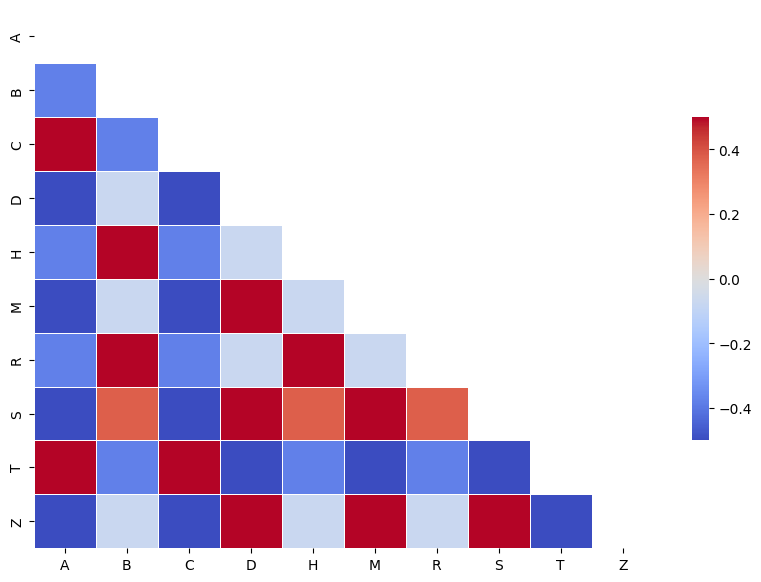

In [ ]:
genres_df = calculate_mlb(Breast_df['source'])

Breast_corr = genres_df.corr()
Breast_mask = np.zeros_like(Breast_corr, dtype=np.bool)
Breast_mask[np.triu_indices_from(Breast_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(Breast_corr, mask=Breast_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

<ipython-input-72-4576612ec60b>:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



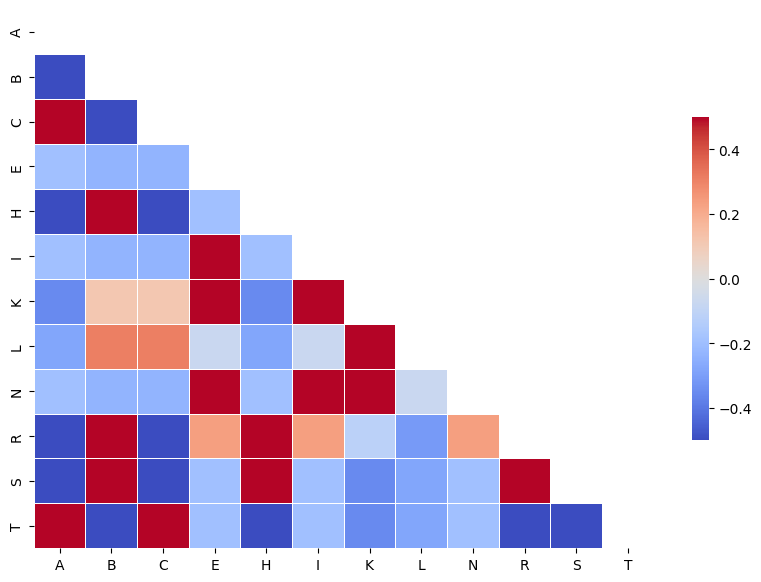

In [ ]:
genres_df = calculate_mlb(Liver_df['source'])

Liver_corr = genres_df.corr()
Liver_mask = np.zeros_like(Liver_corr, dtype=np.bool)
Liver_mask[np.triu_indices_from(Liver_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(Liver_corr, mask=Liver_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

## Word cloud

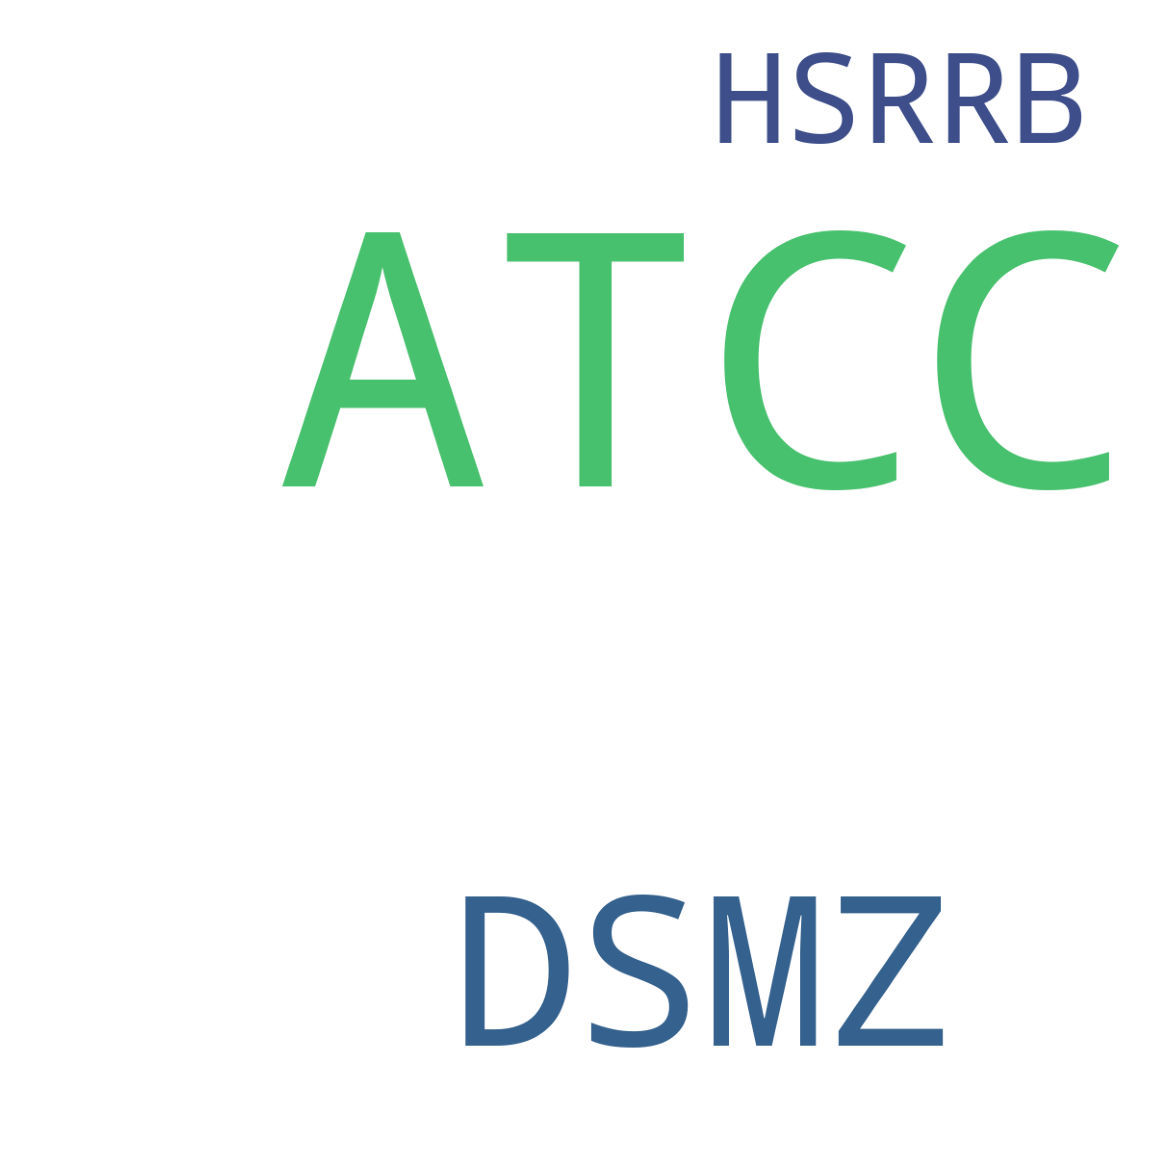

In [ ]:
from wordcloud import WordCloud

text = str(list(Breast_df['source'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Duration analysis

### Analyze Series duration

This values are in term of seasons, so there is no much to analyze.

As we can see the most of the series are only **1 season** probably becasuse they were cancelled or they are new and the second one is in production.

In [ ]:
fig = px.histogram(x=Liver_df['cell_line_NNMD'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of hospital stay duration",
    xaxis_title="Duration of the Disease",
)
fig.show()

### Movie duration Alasysis

Lets split the data duration into bins:
- Less than 1.30 hours
- More than 1.30 hours and less than 2.30 hours
- Morte than 2.30 hours

As we can see, the most part of the movies' **duration is between 1.30 hours and 2.30 hours**

In [ ]:
temp_staying = pd.to_numeric(Breast_df['cell_line_NNMD'], errors='coerce')


In [ ]:
temp_staying

16          NaN
42    -4.531994
43    -3.489952
49    -3.414655
60    -4.217408
67    -4.536654
70    -1.639015
212   -2.913264
224   -3.717563
241         NaN
282   -4.481048
284   -2.879090
287   -6.461418
327   -4.804740
360   -3.267076
371   -2.996943
389   -4.064198
402   -4.526833
416   -3.879182
427   -2.932250
442         NaN
456   -4.711860
523   -4.335250
559   -2.493675
652   -2.855143
668   -3.094022
712   -5.064641
715   -3.839521
765   -5.133974
801   -5.856253
852   -2.762234
869   -5.242670
876   -4.290230
879   -2.615954
Name: cell_line_NNMD, dtype: float64

In [ ]:
Breast_df.loc[Breast_df.loc[(temp_staying < -0.1) & (temp_staying > 0.9)].index, 'duration_bin'] = 'Large'
Breast_df.loc[Breast_df.loc[(temp_staying < -1) & (temp_staying > -1.9)].index, 'duration_bin'] = 'Medium'
Breast_df.loc[Breast_df.loc[temp_staying < -2.0].index, 'duration_bin'] = 'Small'

In [ ]:
Breast_df.duration_bin.unique()

array([nan, 'Small', 'Medium'], dtype=object)

In [ ]:
fig = px.histogram(x=Breast_df['duration_bin'], color=Breast_df['duration_bin'])
fig.update_xaxes(categoryorder = "array",
                categoryarray = ['Small', 'Medium', 'Large'],
                )
fig.update_layout(
    title="Distribution of Hopspital duration",
    xaxis_title="Duration of the Staying",
)
fig.show()

# Top lineage difference by year

As we saw in the previos steps, in the last 4 years, there has been  a huge amount of shows releases. So we are going to explore the distribution of genres by year.

We are going to use new plot **sunburst**. Maybe it's not the best plot for this porpose, but i want to use and how different types of charts.

In [ ]:
def check_genre_contains(genres):
    for genre in genres:
        if genre in top_breast_genres:
            return True
    return False

In [ ]:
Breast_df['principal_lineage'] = Breast_df['lineage'].apply(lambda lineage: lineage[0])
Breast_df['principal_lineage'].head()

16    b
42    b
43    b
49    b
60    b
Name: principal_lineage, dtype: object